# Clusterização

In [ ]:
# @title 1. IMPORTA AS BIBLIOTECAS

import io
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import cluster as ct
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# @title 2.0 IMPORTA O ARQUIVO X_dataset

from google.colab import files
#uploaded = files.upload()
dataset = pd.read_csv('X_dataset.csv', sep=',', encoding='utf-8')

In [ ]:
dataset

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,0.970356,0.305159,0.301803,-0.332922,0.241379,0.056962,1.274310,-0.930179,1.142811,0.130081,0.172161,0.329529
174,0.493343,0.626482,0.414820,1.052516,0.158572,0.282759,0.086498,0.549108,-0.316950,0.969783,0.178862,0.106227,0.336662
175,0.332758,0.699605,-0.389355,0.151661,1.422412,0.210345,0.073840,0.549108,-0.422075,2.224236,0.089431,0.106227,0.397290
176,0.209232,0.365613,0.012732,0.151661,1.422412,0.231034,0.071730,1.354888,-0.229346,1.834923,0.097561,0.128205,0.400856


In [ ]:
dataset.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,-8.382808e-16,0.315484,-8.170742e-16,-3.991813e-17,-3.991813e-17,0.453487,0.356386,3.592632e-16,-1.197544e-16,3.991813e-17,0.388170,0.491460,0.334446
std,1.002821e+00,0.220780,1.002821e+00,1.002821e+00,1.002821e+00,0.215811,0.210730,1.002821e+00,1.002821e+00,1.002821e+00,0.185831,0.260070,0.224613
min,-2.434235e+00,0.000000,-3.679162e+00,-2.671018e+00,-2.088255e+00,0.000000,0.000000,-1.868234e+00,-2.069034e+00,-1.634288e+00,0.000000,0.000000,0.000000
25%,-7.882448e-01,0.170455,-5.721225e-01,-6.891372e-01,-8.244151e-01,0.262931,0.182489,-7.401412e-01,-5.972835e-01,-7.951025e-01,0.245935,0.244505,0.158702
50%,6.099988e-02,0.222332,-2.382132e-02,1.518295e-03,-1.222817e-01,0.474138,0.378692,-1.760948e-01,-6.289785e-02,-1.592246e-01,0.394309,0.553114,0.282097
75%,8.361286e-01,0.462945,6.981085e-01,6.020883e-01,5.096384e-01,0.627586,0.534810,6.095413e-01,6.291754e-01,4.939560e-01,0.520325,0.695971,0.504280
max,2.259772e+00,1.000000,3.156325e+00,3.154511e+00,4.371372e+00,1.000000,1.000000,2.402403e+00,3.485073e+00,3.435432e+00,1.000000,1.000000,1.000000


In [ ]:
dataset.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
ash_alcanity,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


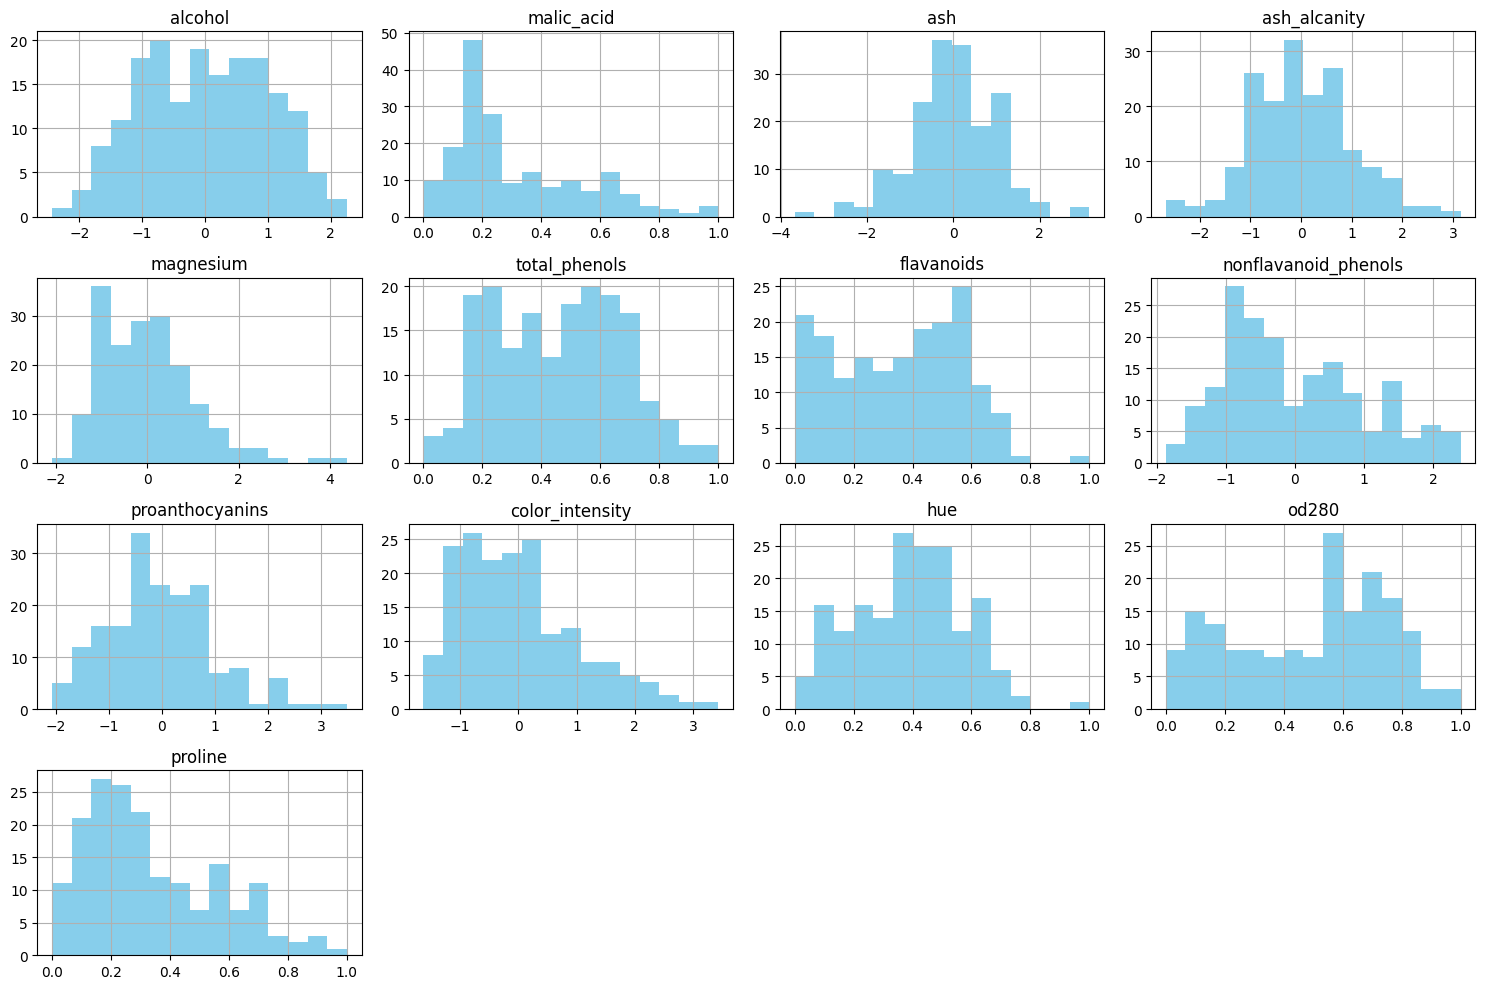

In [ ]:
dataset.hist(bins=15, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()

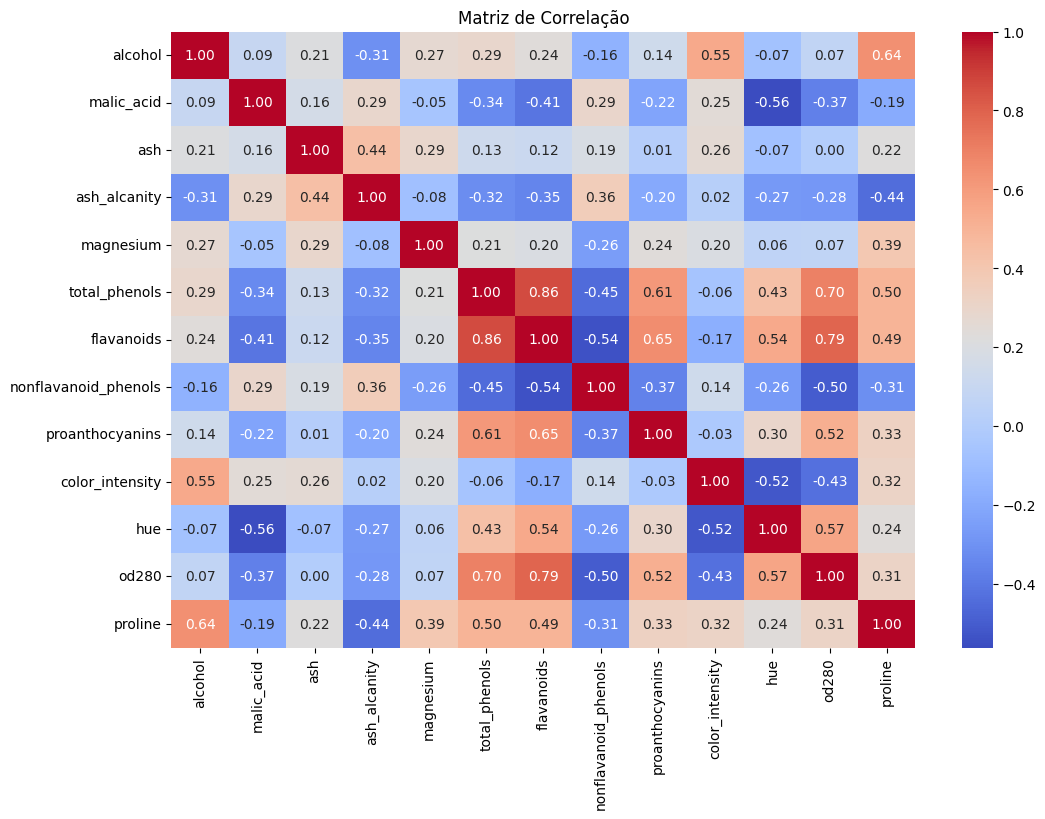

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = dataset.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Desvio padrão e média de cada coluna
variability = dataset.std() / dataset.mean()
variability_df = pd.DataFrame({"Mean": dataset.mean(), "Std Dev": dataset.std(), "Coeficiente de Variação": variability})
print(variability_df.sort_values(by="Coeficiente de Variação"))


                              Mean   Std Dev  Coeficiente de Variação
ash_alcanity         -3.991813e-17  1.002821            -2.512194e+16
magnesium            -3.991813e-17  1.002821            -2.512194e+16
proanthocyanins      -1.197544e-16  1.002821            -8.373980e+15
ash                  -8.170742e-16  1.002821            -1.227331e+15
alcohol              -8.382808e-16  1.002821            -1.196283e+15
total_phenols         4.534870e-01  0.215811             4.758917e-01
hue                   3.881703e-01  0.185831             4.787346e-01
od280                 4.914599e-01  0.260070             5.291780e-01
flavanoids            3.563860e-01  0.210730             5.912962e-01
proline               3.344460e-01  0.224613             6.715974e-01
malic_acid            3.154839e-01  0.220780             6.998135e-01
nonflavanoid_phenols  3.592632e-16  1.002821             2.791327e+15
color_intensity       3.991813e-17  1.002821             2.512194e+16


In [ ]:
# Padronizar os dados
scaler = StandardScaler()
dataset_scaler = scaler.fit_transform(dataset)

In [ ]:
# Reduzir a dimensionalidade
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_scaler)

In [ ]:
type(dataset_pca)

numpy.ndarray

## K-Means

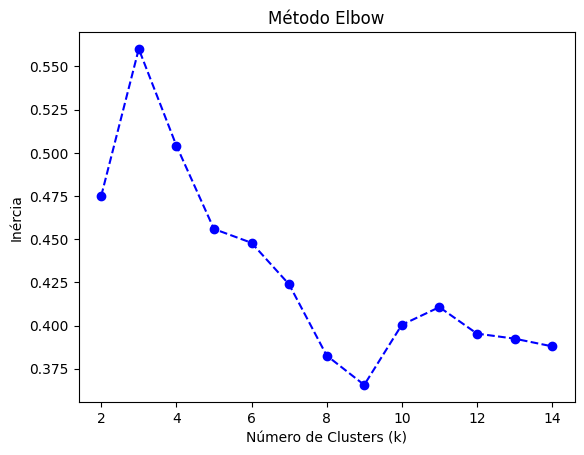

In [ ]:
# Training
silhouette_avg = []
k_values = range(2, 15)

for k in k_values:
    kmeans = ct.KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dataset_pca)
    labels = kmeans.fit_predict(dataset_pca)
    silhouette_avg.append(mt.silhouette_score(dataset_pca, labels))

# Plot
plt.plot(k_values, silhouette_avg, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow')
plt.show()

In [ ]:
if not isinstance(dataset_pca, pd.DataFrame):
    dataset = pd.DataFrame(dataset_pca, columns=[f'feature_{i}' for i in range(dataset_pca.shape[1])])


best_k = 3
kmeans = ct.KMeans(n_clusters=best_k, random_state=0)
labels = kmeans.fit_predict(dataset_pca)

dataset['Cluster'] = labels
ss_kmeans = mt.silhouette_score(dataset_pca, labels)
ss_kmeans

0.5601697480957203

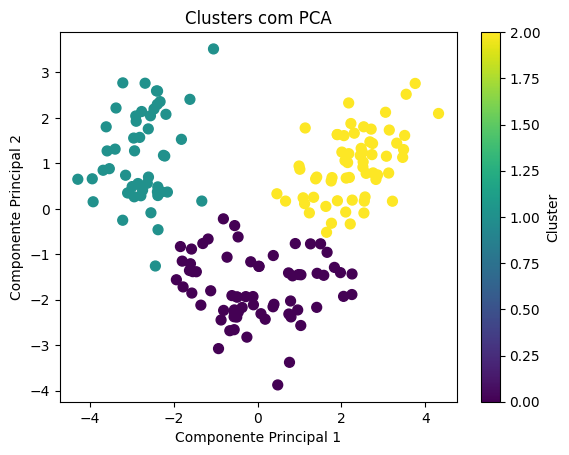

In [ ]:
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

## Affinity Propagation

In [ ]:
par_preference = np.arange(-1000, -10, 50)

results= []
for p in par_preference:
  af_prop = ct.AffinityPropagation(preference=p, random_state=0)
  af_prop.fit(dataset_scaler)

  labels = af_prop.predict(dataset_scaler)
  n_clusters = len(np.unique(labels))

  if n_clusters > 1:
    siluhouette_avg = mt.silhouette_score(dataset_scaler, labels)

    results.append({
        "Preference": p,
        "Clusters": n_clusters,
        "Silhouette Score": siluhouette_avg
    })

# Convertendo para DataFrame para análise
results_df = pd.DataFrame(results)
best_result = results_df.loc[results_df['Silhouette Score'].idxmax()]
print("Melhor combinação:")
print(best_result)

Melhor combinação:
Preference         -400.000000
Clusters              3.000000
Silhouette Score      0.280259
Name: 7, dtype: float64


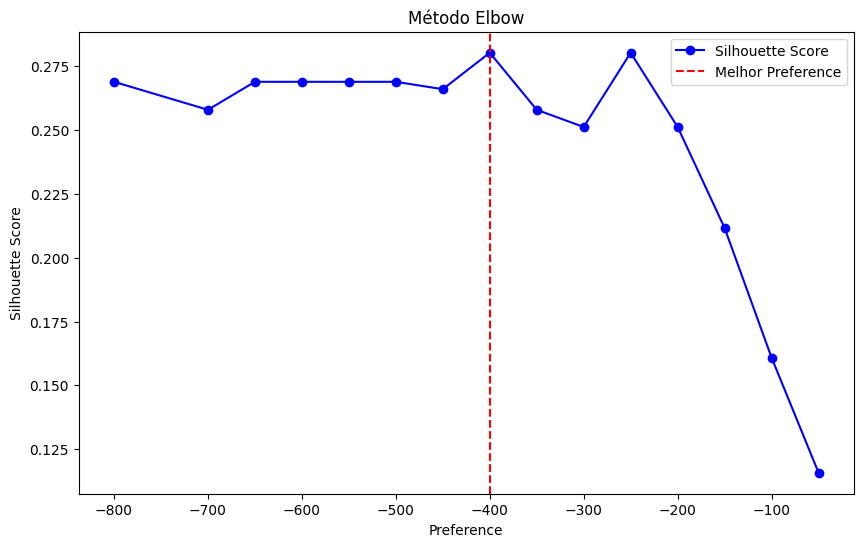

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Preference'], results_df['Silhouette Score'], marker='o', label='Silhouette Score', color='blue')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.title('Método Elbow')
plt.axvline(x=results_df.loc[results_df['Silhouette Score'].idxmax(), 'Preference'], color='red', linestyle='--', label='Melhor Preference')
plt.legend()
plt.show()

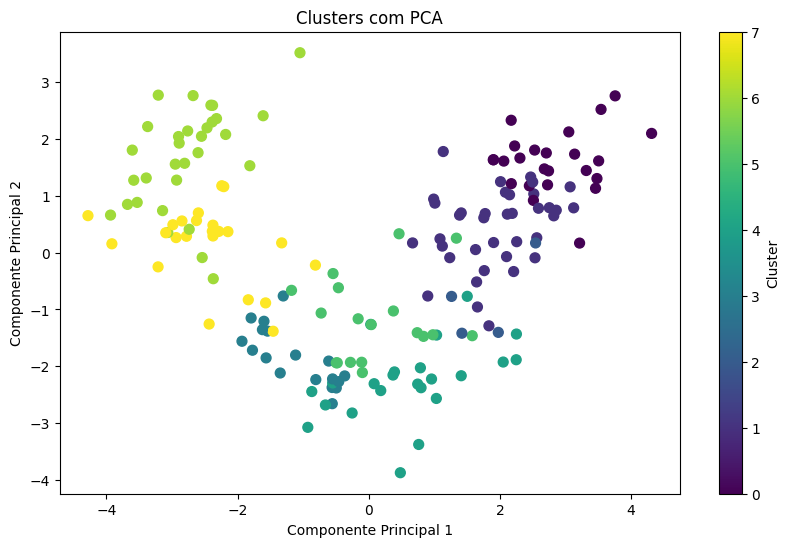

In [ ]:
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_scaler)

plt.figure(figsize=(10, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()